In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [57]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

The last date of entry is 2017-08-23.
The date one year before the last date of entry is 2016-08-22 00:00:00.


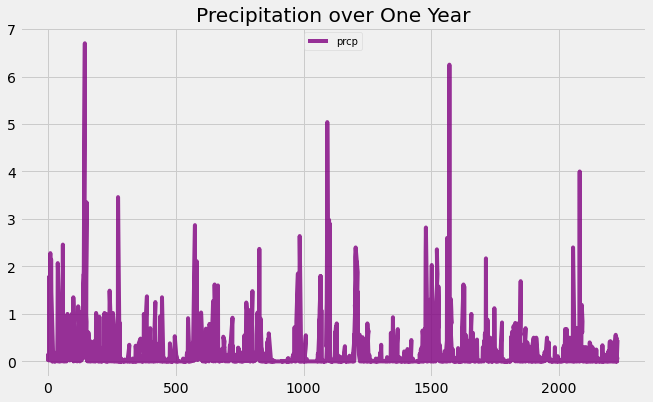

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

#Last date of entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f'The last date of entry is {last_date}.')

#Calculate one year from last date of entry
first_date = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=366)
print(f'The date one year before the last date of entry is {first_date}.')

# Perform a query to retrieve the data and precipitation scores
one_year_query = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql(one_year_query, engine).dropna()
precip_df.head(5)

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date',ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation over One Year", color='purple', alpha=0.8, figsize=(10,6))
plt.legend(loc='upper center', prop={'size': 10})
plt.savefig("Precipitation.png")
plt.show()


In [108]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df[["prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [110]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Measurement.station).distinct().count()
print(f"Available Stations Count: {num_stations} ")

Available Stations Count: 9 


In [111]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [112]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_info = stations[0][0]
weather_info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == station_info).all()
print(f"Weather Information from Most Active Station:")
print(f"Low: {weather_info[0][0]} High: {weather_info[0][1]} Average: {round(weather_info[0][2], 1)}")

Weather Information from Most Active Station:
Low: 54.0 High: 85.0 Average: 71.7


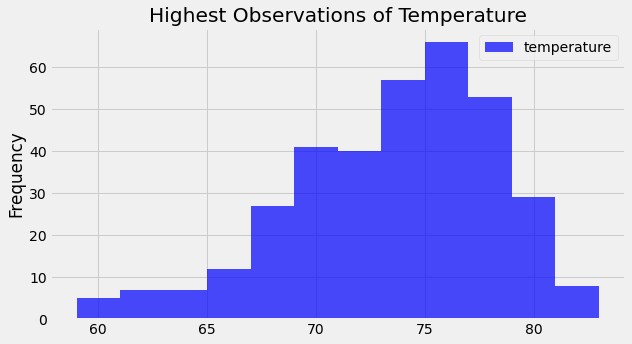

In [125]:
# Choose the station with the highest number of temperature observations.
high_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
high_temp_obs = high_temp_obs[0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query( Measurement.tobs).filter(Measurement.date >= first_date).filter(Measurement.station == high_temp_obs).all()
temp_obs = pd.DataFrame(temp_obs, columns=['temperature'])
temp_obs.plot.hist(bins=12, title="Highest Observations of Temperature",color='blue', alpha=0.7, figsize=(9,5))
plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.savefig("HighObvTemp.png")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
